# Simulations Setup

This notebook introduces how the power spectra simulations are done and describes the settings and parameters we will use. 

In [1]:
%matplotlib inline

In [2]:
from fooof import FOOOF
from fooof.sim import gen_power_spectrum
from fooof.plts import plot_spectrum

In [3]:
# Import project specific (local) custom code
import sys
sys.path.append('../code')
from settings import *
from utils import *

## Simulate example power spectra

In [4]:
# Simulation settings
ap = [0, 1]
osc = [10, 0.25, 1.5]
nlv = 0.0

# Generate the spectrum
freqs, powers = gen_power_spectrum(F_RANGE, ap, osc, nlv, F_RES)

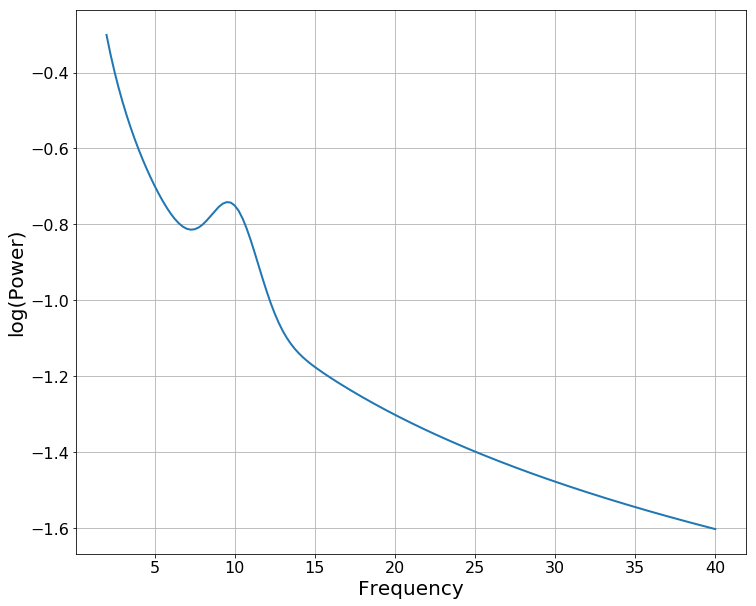

In [5]:
# Plot example simulated power spectrum
plot_spectrum(freqs, powers, log_powers=True)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.0029, 1.0018                                          
                                                                                                  
                                       1 peaks were found:                                        
          

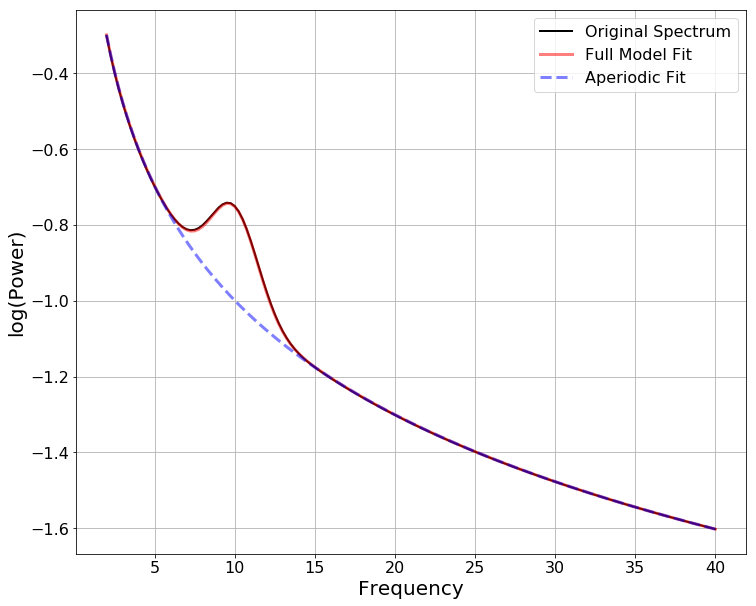

In [6]:
# Parameterize our simulated spectrum
fm = FOOOF(aperiodic_mode='fixed', verbose=False)
fm.report(freqs, powers, plt_log=False)

In [7]:
# Compare actual parameters to FOOOF fit
print(ap, '\t', fm.aperiodic_params_)
print(osc, '\t', fm.gaussian_params_)

[0, 1] 	 [0.00290008 1.00179528]
[10, 0.25, 1.5] 	 [[10.00629043  0.24771999  1.47166652]]


#### Simulate another power spectrum, this one with a knee

In [8]:
# Settings
ap = [1, 100, 2]
osc = [10, 0.3, 1]
nlv = 0.

# Simulate the power spectrum
fs, ps = gen_power_spectrum(F_RANGE_LONG, ap, osc, nlv, F_RES_LONG)

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     1.0005, 100.0434, 2.0003                                     
                                                                                                  
                                       1 peaks were found:                                        
          

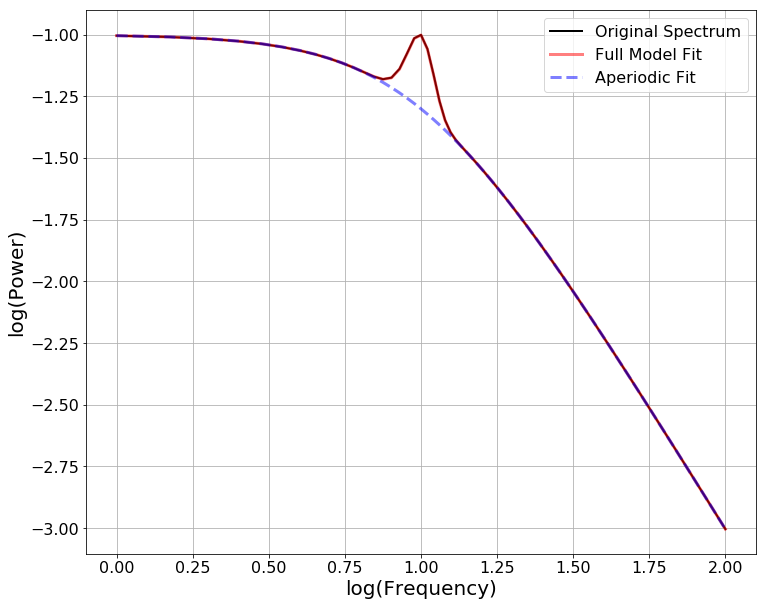

In [9]:
# Parameterize the power spectrum
fm = FOOOF(aperiodic_mode='knee', verbose=False)
fm.report(fs, ps, plt_log=True)

In [10]:
# Compare actual parameters to FOOOF fit
print(ap, '\t', fm.aperiodic_params_)
print(osc, '\t', fm.gaussian_params_)

[1, 100, 2] 	 [  1.00049649 100.04337419   2.00028283]
[10, 0.3, 1] 	 [[10.00018128  0.29916498  0.99465244]]


## Settings for Simulating Power Spectra

Settings to be used for simulating power spectra are defined in `sim_utils.py`. 

Here we will just check the settings that are being used. 

In [11]:
# Check the settings for the number of oscillations
print_settings(N_PEAK_OPTS, N_PEAK_PROBS, '# of oscs')

Parameter definition for # of oscs 

	Value 	 Probability
	0 	 33.3%
	1 	 33.3%
	2 	 33.3%


In [12]:
# Check the settings for the oscillation center frequencies
print_settings(CF_OPTS, CF_PROBS, 'CFs')

Parameter definition for CFs 

	Value 	 Probability
	3 	 0.9%
	4 	 1.1%
	5 	 3.0%
	6 	 5.2%
	7 	 4.1%
	8 	 4.7%
	9 	 6.9%
	10 	 9.1%
	11 	 6.0%
	12 	 3.6%
	13 	 3.0%
	14 	 2.8%
	15 	 3.1%
	16 	 3.1%
	17 	 3.4%
	18 	 4.2%
	19 	 4.7%
	20 	 3.9%
	21 	 5.0%
	22 	 5.0%
	23 	 2.9%
	24 	 2.8%
	25 	 2.7%
	26 	 2.2%
	27 	 2.0%
	28 	 1.5%
	29 	 1.0%
	30 	 0.7%
	31 	 0.4%
	32 	 0.3%
	33 	 0.3%
	34 	 0.2%


In [13]:
# Check the settings for the oscillation powers
print_settings(PW_OPTS, PW_PROBS, 'PWs')

Parameter definition for PWs 

	Value 	 Probability
	0.15 	 25.0%
	0.2 	 25.0%
	0.25 	 25.0%
	0.4 	 25.0%


In [14]:
# Check the settings for the oscillation bandwidths
print_settings(BW_OPTS, BW_PROBS, 'BWs')

Parameter definition for BWs 

	Value 	 Probability
	1.0 	 33.3%
	2.0 	 33.3%
	3.0 	 33.3%


In [15]:
# Check the settings for the aperiodic offsets
print_settings(OFF_OPTS, OFF_PROBS, 'aperiodic offset')

Parameter definition for aperiodic offset 

	Value 	 Probability
	0 	 100.0%


In [16]:
# Check the settings for the aperiodic knee
print_settings(KNE_OPTS, KNE_PROBS, 'aperiodic knee')

Parameter definition for aperiodic knee 

	Value 	 Probability
	0 	 20.0%
	10 	 20.0%
	25 	 20.0%
	100 	 20.0%
	150 	 20.0%


In [17]:
# Check the settings for the aperiodic exponents
print_settings(EXP_OPTS, EXP_PROBS, 'aperiodic exponent')

Parameter definition for aperiodic exponent 

	Value 	 Probability
	0.5 	 25.0%
	1 	 25.0%
	1.5 	 25.0%
	2 	 25.0%


In [18]:
# Sanity check probabilities are set correctly
for probs in [CF_PROBS, PW_PROBS, BW_PROBS, OFF_PROBS, KNE_PROBS, EXP_PROBS]:
    assert np.isclose(sum(probs), 1, 1e-10)
print('All probabilities check out.')

All probabilities check out.
